# Pre procesamiento de los datos
Versión previa: Oct 21, 2020 

Modificado en Mayo 3, 2021

[1. Adquisición datos](#1.-Adquisición-datos)

[2. Preprocesamiento](#Preprocesamiento)

* [Columnas de valor único](#1.-Columnas-de-valor-único)
* [Convirtiendo strings en floats](#2.-Convirtiendo-strings-en-floats)
* [Datos faltantes](#3.-Datos-faltantes)
* [Agrupando: 'Property_type' y 'Bed_type](#4.-Agrupando-'Property_type'-y-'Bed_type)
* [Availability](#Availability)
* [Eliminando columnas](#5.-Columnas-a-eliminar-dada-la-naturaleza-de-sus-datos)
* [Replacing f, t](#6.-Replacing-f,-t)
* [Bathrooms](#7.-Bathrooms)
* [Amenities](#Amenities)
* [Reemplazando False and True por 0,1](#6.-Reemplazando-False-and-True-por-0,1)
* [Generando dummies](#8.-Generando-dummies-de-variables-categóricas)
* [Removiendo datos faltantes](#9.-Removiendo-datos-faltantes)

[3. Dataset final](#3.-Dataset-final)

### 1. Adquisición datos

Los datos han sido extraídos del repositorio oficial de [Airbnb](http://insideairbnb.com/get-the-data.html). Este script ulitiza la actualización de Abril 7 del 2021 para la ciudad de New York

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import time
pd.options.display.max_columns = None
pd.options.display.max_rows= None

In [2]:
listings=pd.read_csv('listings.csv')

print(f'El dataset de entrada contiene {listings.shape[0]} filas y {listings.shape[1]} columnas')

El dataset de entrada contiene 36905 filas y 74 columnas


In [3]:
listings.tail(2)

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
36903,49091581,https://www.airbnb.com/rooms/49091581,20210407173759,2021-04-09,Furnished Bright Apartment in Hell's Kitchen,1 bedroom apartment in Hell's Kitchen.<br />Mo...,NaN,https://a0.muscache.com/pictures/8f730543-a68b...,305240193,https://www.airbnb.com/users/show/305240193,June,2019-10-29,"New York, New York, United States","At June Homes, our mission is to make renting ...",within a few hours,99%,46%,f,https://a0.muscache.com/im/pictures/user/4adc1...,https://a0.muscache.com/im/pictures/user/4adc1...,Crown Heights,1.0,1.0,"['email', 'phone', 'jumio', 'offline_governmen...",t,t,NaN,Hell's Kitchen,Manhattan,40.76456,-73.98573,Entire apartment,Entire home/apt,1,NaN,1 bath,1.0,1.0,"[""Refrigerator"", ""Essentials"", ""Long term stay...",$123.00,30,180,30.0,30.0,180.0,180.0,30.0,180.0,NaN,t,0,7,37,312,2021-04-09,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,241,42,199,0,NaN
36904,49092532,https://www.airbnb.com/rooms/49092532,20210407173759,2021-04-09,Panoramic city views! 2/3 bdrms private terra...,You’ll be right in the heart of everything at ...,Best neighborhood in NYC !! You have easy walk...,https://a0.muscache.com/pictures/a060b725-ee2d...,154949847,https://www.airbnb.com/users/show/154949847,Emily,2017-10-17,"West New York, New Jersey, United States",We are Emily and Robin and we started travelin...,within a few hours,97%,16%,f,https://a0.muscache.com/im/pictures/user/8a057...,https://a0.muscache.com/im/pictures/user/8a057...,Williamsburg,18.0,18.0,"['email', 'phone', 'reviews', 'offline_governm...",t,t,"New York, United States",Hell's Kitchen,Manhattan,40.77034,-73.99305,Entire apartment,Entire home/apt,6,NaN,2 baths,2.0,3.0,"[""Essentials"", ""Dryer"", ""Long term stays allow...",$299.00,30,85,30.0,30.0,85.0,85.0,30.0,85.0,NaN,t,0,25,55,175,2021-04-09,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,10,10,0,0,NaN


En las columnas se incluye información relacionada con:
* Descripción
* Arrendatario
* Geolocalización
* Caracteristicas del espacio
* Precio
* Valores adicionales
* Calificación
* Licencias

In [4]:
listings.columns.to_list()

['id',
 'listing_url',
 'scrape_id',
 'last_scraped',
 'name',
 'description',
 'neighborhood_overview',
 'picture_url',
 'host_id',
 'host_url',
 'host_name',
 'host_since',
 'host_location',
 'host_about',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_thumbnail_url',
 'host_picture_url',
 'host_neighbourhood',
 'host_listings_count',
 'host_total_listings_count',
 'host_verifications',
 'host_has_profile_pic',
 'host_identity_verified',
 'neighbourhood',
 'neighbourhood_cleansed',
 'neighbourhood_group_cleansed',
 'latitude',
 'longitude',
 'property_type',
 'room_type',
 'accommodates',
 'bathrooms',
 'bathrooms_text',
 'bedrooms',
 'beds',
 'amenities',
 'price',
 'minimum_nights',
 'maximum_nights',
 'minimum_minimum_nights',
 'maximum_minimum_nights',
 'minimum_maximum_nights',
 'maximum_maximum_nights',
 'minimum_nights_avg_ntm',
 'maximum_nights_avg_ntm',
 'calendar_updated',
 'has_availability',
 'availability_30',
 'availa

### Preprocesamiento

#### 1. Columnas de valor único

In [5]:
for col in listings.columns: ##Eliminando las columnas que tienen un solo valor 
    if len(listings[col].unique()) == 1:
        listings.drop(col,inplace=True,axis=1)
        
print(f'Luego de remover las columnas con un valor único, permanecen {len(listings.columns)} columnas')

Luego de remover las columnas con un valor único, permanecen 70 columnas


#### 2. Convirtiendo strings en floats

In [6]:
def removing_percentage (dataset, column): #Eliminando % del string y convirtiendolo en número
    dataset[column]=dataset[column].str.replace('%', '').astype('float')
    print(f'La columna  {column} ha sido modificada de string a float')

removing_perc=['host_acceptance_rate', 'host_response_rate']

for var in removing_perc:
    removing_percentage(listings, var)

La columna  host_acceptance_rate ha sido modificada de string a float
La columna  host_response_rate ha sido modificada de string a float


In [7]:
listings['price']=listings['price'].str.replace('$', '')
listings['price']=listings['price'].str.replace(',', '').astype('float')

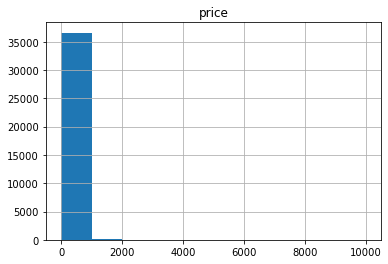

In [8]:
listings.hist(column='price', bins=10)
plt.show()

In [9]:
listings.price.describe()

count    36905.000000
mean       148.559274
std        290.379973
min          0.000000
25%         61.000000
50%        100.000000
75%        160.000000
max      10000.000000
Name: price, dtype: float64

Delimitando el rango de análisis a valores de precio mayores a cero y menores a 1.000USD

In [10]:
listings=listings[(listings['price']>0) & (listings['price']<1000)]

In [11]:
listings.shape

(36559, 70)

#### 3. Datos faltantes

In [12]:
is_na=listings.isna().sum().sort_values(ascending=False)
np.round(100*is_na/len(np.unique(listings['id'])),2)

host_response_time                              49.48
host_response_rate                              49.48
host_acceptance_rate                            45.32
host_about                                      42.40
neighborhood_overview                           37.28
neighbourhood                                   37.28
review_scores_value                             28.03
review_scores_location                          28.03
review_scores_checkin                           28.03
review_scores_accuracy                          28.00
review_scores_communication                     27.99
review_scores_cleanliness                       27.97
review_scores_rating                            27.93
first_review                                    26.06
reviews_per_month                               26.06
last_review                                     26.06
host_neighbourhood                              20.58
bedrooms                                         9.91
host_location               

In [13]:
listings.bedrooms=listings.bedrooms.fillna(round(np.mean(listings.bedrooms.dropna()))) #Completando datos faltantes con media
listings.beds=listings.beds.fillna(round(np.mean(listings.beds.dropna())) )

In [14]:
listings.bedrooms.value_counts()

1.0     29404
2.0      5001
3.0      1582
4.0       434
5.0        90
6.0        21
8.0        12
7.0         8
9.0         3
10.0        2
13.0        1
11.0        1
Name: bedrooms, dtype: int64

In [15]:
listings.bedrooms.value_counts()

1.0     29404
2.0      5001
3.0      1582
4.0       434
5.0        90
6.0        21
8.0        12
7.0         8
9.0         3
10.0        2
13.0        1
11.0        1
Name: bedrooms, dtype: int64

Para bedrooms y beds mayores a 9 se aggregan en 10.

In [16]:
listings['bedrooms']=np.where(listings['bedrooms']>7,8, listings['bedrooms'])
listings['beds']=np.where(listings['beds']>9,10, listings['bedrooms'])

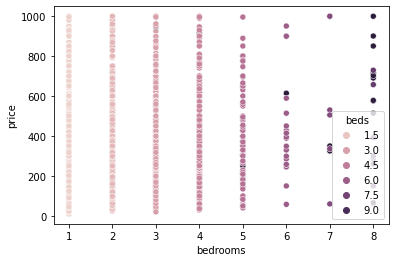

In [17]:
sns.scatterplot(x='bedrooms',y='price', hue='beds',data=listings)
plt.show()

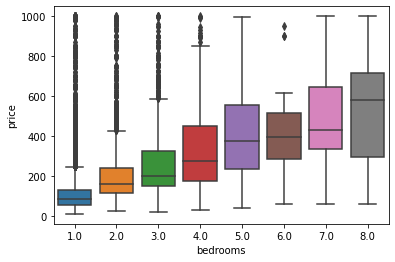

In [18]:
sns.boxplot(x='bedrooms', y='price', data=listings)
plt.show()

Se identifican y almacenan las columnas con un porcentaje superior a 25% de datos faltantes, para ser eliminadas posteriormente.

In [19]:
most_missing_cols = listings.columns[listings.isnull().sum()/len(listings) > 0.25]
most_missing_cols =most_missing_cols.to_list() #Columnas con un porcentaje de datos faltantes superior al 25%

In [20]:
most_missing_cols

['neighborhood_overview',
 'host_about',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'neighbourhood',
 'first_review',
 'last_review',
 'review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value',
 'reviews_per_month']

In [21]:
listings.shape

(36559, 70)

#### 4. Agrupando 'Property_type' y 'Bed_type

In [22]:
listings.property_type.value_counts()

Entire apartment                      15224
Private room in apartment             12007
Private room in house                  1891
Private room in townhouse              1081
Entire house                            948
Entire condominium                      944
Entire loft                             596
Entire townhouse                        567
Shared room in apartment                514
Private room in condominium             472
Room in hotel                           397
Private room in loft                    331
Room in boutique hotel                  315
Entire serviced apartment               283
Entire guest suite                      254
Private room in guest suite             100
Shared room in house                     70
Entire guesthouse                        48
Private room in serviced apartment       44
Room in aparthotel                       43
Private room in bed and breakfast        38
Entire place                             34
Room in serviced apartment      

In [23]:
listings.loc[listings.property_type.str.contains('oom'), 'property_type']='Room'
listings.loc[listings.property_type.str.contains('ap'), 'property_type']='Apartment'
listings.loc[listings.property_type.str.contains('house'), 'property_type']='House'
listings.loc[listings.property_type.str.contains('Casa'), 'property_type']='House'
listings.loc[~listings['property_type'].isin(['Room', 'Apartment', 'House']),'property_type']='Other'

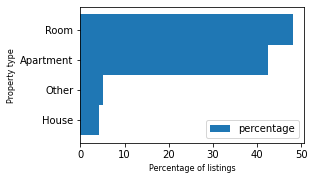

In [24]:
pivot0=listings.pivot_table(index='property_type', values='id', aggfunc='count').sort_values(by='id', ascending=True)
pivot0['percentage']= np.round(100* (pivot0['id']/pivot0['id'].sum()),1)
pivot0=pivot0.reset_index()

feq = pivot0[['property_type', 'percentage']].sort_values('percentage')
feq=feq.set_index('property_type')
feq.plot.barh(figsize=(4,2.5),  width= 1)
plt.xlabel('Percentage of listings', fontsize = 8)
plt.ylabel('Property type', fontsize = 8)
plt.show()

In [25]:
listings[['price', 'property_type']].groupby('property_type').describe()

price                                                     \
                 count        mean         std   min    25%    50%    75%   
property_type                                                               
Apartment      15512.0  168.314466  108.049834  10.0  100.0  141.0  200.0   
House           1575.0  230.829206  177.802092  30.0  111.0  169.0  286.0   
Other           1900.0  213.680000  160.027008  10.0  114.0  160.0  250.0   
Room           17572.0   81.348054   80.082547  10.0   45.0   62.0   90.0   

                      
                 max  
property_type         
Apartment      999.0  
House          995.0  
Other          999.0  
Room           999.0

In [26]:
r=listings.pivot_table(index='room_type', values='id', aggfunc='count', margins=True).sort_values(by='id', ascending=True)
r.columns=['Total']
r

,Total
room_type,
Hotel room,234
Shared room,664
Private room,16635
Entire home/apt,19026
All,36559


In [27]:
listings['room_type']=listings['room_type'].replace('Hotel room', 'Private room') 

In [28]:
listings[['price','property_type' ,'room_type']].groupby(['property_type','room_type']).describe()

price                                       \
                                 count        mean         std   min    25%   
property_type room_type                                                       
Apartment     Entire home/apt  15512.0  168.314466  108.049834  10.0  100.0   
House         Entire home/apt   1575.0  230.829206  177.802092  30.0  111.0   
Other         Entire home/apt   1900.0  213.680000  160.027008  10.0  114.0   
Room          Entire home/apt     39.0  133.615385  108.263960  35.0   82.5   
              Private room     16869.0   81.569743   79.564666  10.0   47.0   
              Shared room        664.0   72.646084   89.409440  15.0   33.0   

                                                    
                                 50%    75%    max  
property_type room_type                             
Apartment     Entire home/apt  141.0  200.0  999.0  
House         Entire home/apt  169.0  286.0  995.0  
Other         Entire home/apt  160.0  250.0  999.0  
Room          Entire home/apt  106.0  120.0  568.0  
              Private room      63.0   90.0  999.0  
              Shared room       45.0   80.0  998.0

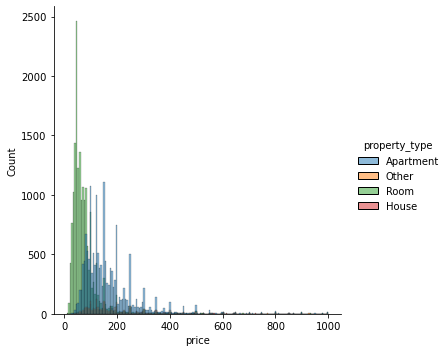

In [29]:
sns.displot(listings, x='price', hue='property_type')
plt.show()

#### Availability

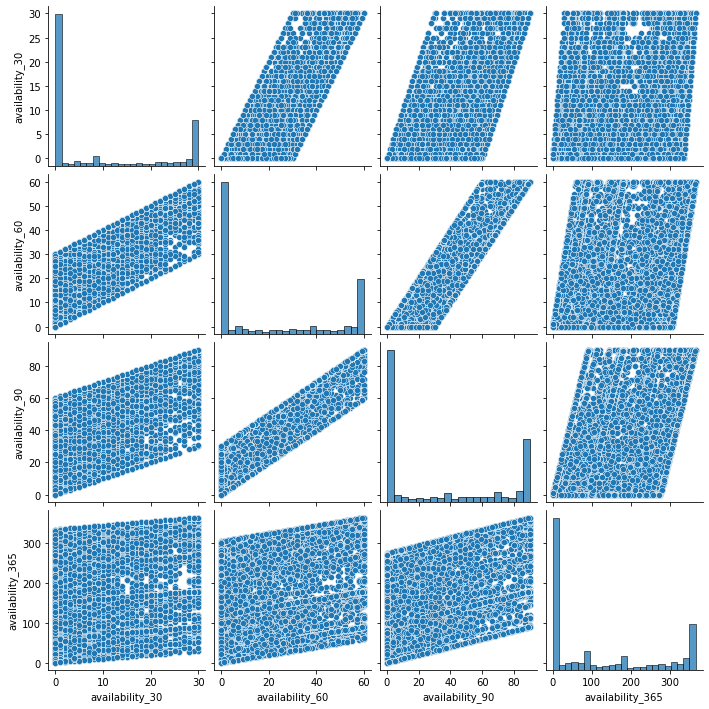

In [30]:
availability=listings[['availability_30','availability_60','availability_90','availability_365']]
sns.pairplot(availability)
plt.show()

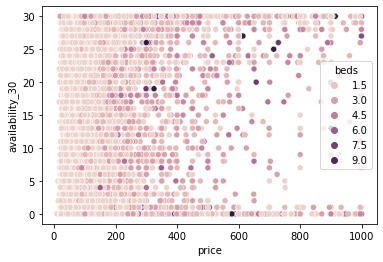

In [31]:
sns.scatterplot(x='price', y='availability_30', hue='beds', data=listings)
plt.show()

#### 5. Columnas a eliminar dada la naturaleza de sus datos

In [32]:
url_field=list(listings.filter(like='url').columns) 
other_pricing_field=list(listings.filter(like='_price').columns)
text_field=['name','neighborhood_overview', 'host_about','description']
other_geo=[  'neighbourhood',  'neighbourhood_cleansed',  'neighbourhood_group_cleansed']
host=['host_id', 'host_name', 'host_since','host_location','host_about','host_neighbourhood',
      'calculated_host_listings_count_private_rooms' ,'host_total_listings_count',
      'calculated_host_listings_count_entire_homes','host_verifications', 'calculated_host_listings_count_shared_rooms']
dates=['last_scraped', 'host_since', 'calendar_last_scraped']
nights=['minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm']
reviews=['number_of_reviews_ltm', 'number_of_reviews_l30d', 'first_review',
       'last_review']
availability=['availability_60','availability_90','availability_365']

In [33]:
listings=listings.drop(most_missing_cols +url_field+other_pricing_field+text_field+other_geo+host+dates+nights+reviews+availability, axis=1)

In [34]:
listings.head(3)

,id,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,latitude,longitude,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,has_availability,availability_30,number_of_reviews,instant_bookable,calculated_host_listings_count
0,2595,f,6.0,t,t,40.75356,-73.98559,Apartment,Entire home/apt,2,1 bath,1.0,1.0,"[""Refrigerator"", ""Essentials"", ""Cleaning befor...",150.0,30,1125,t,30,48,f,3
1,3831,f,1.0,t,t,40.68494,-73.95765,Other,Entire home/apt,3,1 bath,1.0,1.0,"[""Bathtub"", ""Smoke alarm"", ""Dishes and silverw...",76.0,1,730,t,1,396,f,1
2,5121,f,1.0,t,t,40.68535,-73.95512,Room,Private room,2,NaN,1.0,1.0,"[""Kitchen"", ""Heating"", ""Wifi"", ""Long term stay...",60.0,30,730,t,30,50,f,1


#### 6. Replacing f, t

In [35]:
listings.replace({'f': 0, 't': 1}, inplace=True)

#### 7. Bathrooms

In [36]:
listings['bathrooms_text'].value_counts()

1 bath               18922
1 shared bath         9354
1 private bath        2111
2 baths               2089
2 shared baths        1094
1.5 baths             1037
1.5 shared baths       735
2.5 baths              279
3 baths                198
0 shared baths         172
3 shared baths         110
2.5 shared baths        89
3.5 baths               52
4 baths                 46
4 shared baths          43
0 baths                 37
Half-bath               32
Shared half-bath        20
Private half-bath       16
4.5 baths                9
6 shared baths           7
5 baths                  6
5.5 baths                4
6 baths                  3
6.5 shared baths         3
3.5 shared baths         3
5 shared baths           2
4.5 shared baths         2
7.5 baths                2
6.5 baths                1
8 baths                  1
5.5 shared baths         1
7 baths                  1
Name: bathrooms_text, dtype: int64

In [37]:
listings['bathroom_type']=0
listings.bathrooms_text=listings.bathrooms_text.fillna('No data')
listings.loc[listings.bathrooms_text.str.contains('shared'), 'bathroom_type']='Shared'
listings.loc[~listings.bathrooms_text.str.contains('shared'), 'bathroom_type']='Private' #No compartido igual a privado
listings.pivot_table(index='bathroom_type', values='id', aggfunc='count', margins=True)

,id
bathroom_type,
Private,24944
Shared,11615
All,36559


In [38]:
listings['bathrooms_text'].head(5)

0       1 bath
1       1 bath
2      No data
3    1.5 baths
4       1 bath
Name: bathrooms_text, dtype: object

In [39]:
listings['t_bathrooms']=round(listings['bathrooms_text'].str.extract('(^\d*[.,]?\d)', expand=True).astype('float'))
listings['t_bathrooms']=listings['t_bathrooms'].fillna(1)


In [40]:
import matplotlib.pyplot as plt
p=listings.pivot_table(index='t_bathrooms', values='id', aggfunc='count').reset_index()
p=p.sort_values(by='t_bathrooms').astype(float)
p

,t_bathrooms,id
0,0.0,209.0
1,1.0,30533.0
2,2.0,5323.0
3,3.0,308.0
4,4.0,155.0
5,5.0,8.0
6,6.0,19.0
7,7.0,1.0
8,8.0,3.0


In [41]:
#listings['t_bathrooms']=np.where(listings['t_bathrooms']>2,3, listings['t_bathrooms'])

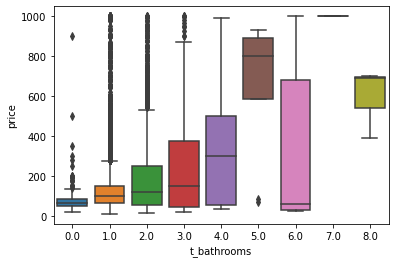

In [42]:
sns.boxplot(data=listings, y='price', x='t_bathrooms')
plt.show()

### Amenities

In [43]:
listings.amenities.tail()

36900    ["Kitchen", "Security cameras on property", "T...
36901    ["Refrigerator", "Essentials", "Long term stay...
36902    ["Kitchen", "Refrigerator", "TV", "Hot water",...
36903    ["Refrigerator", "Essentials", "Long term stay...
36904    ["Essentials", "Dryer", "Long term stays allow...
Name: amenities, dtype: object

In [44]:
listings.dtypes

id                                  int64
host_is_superhost                 float64
host_listings_count               float64
host_has_profile_pic              float64
host_identity_verified            float64
latitude                          float64
longitude                         float64
property_type                      object
room_type                          object
accommodates                        int64
bathrooms_text                     object
bedrooms                          float64
beds                              float64
amenities                          object
price                             float64
minimum_nights                      int64
maximum_nights                      int64
has_availability                    int64
availability_30                     int64
number_of_reviews                   int64
instant_bookable                    int64
calculated_host_listings_count      int64
bathroom_type                      object
t_bathrooms                       

##### Listings amenities in lower case

In [45]:
time_start = time.time()
listings=listings.apply(lambda x: x.astype(str).str.lower())
time_end = time.time()
print(f"\nTiempo de ejecución: {round((time_end - time_start)/60,1)} minutos")


Tiempo de ejecución: 0.0 minutos


In [46]:
listings.amenities.head()

0    ["refrigerator", "essentials", "cleaning befor...
1    ["bathtub", "smoke alarm", "dishes and silverw...
2    ["kitchen", "heating", "wifi", "long term stay...
3    ["kitchen", "cable tv", "tv", "carbon monoxide...
4    ["heating", "bed linens", "tv", "iron", "free ...
Name: amenities, dtype: object

The desired amenities were defined based on an article published by [Airbnb](
https://www.airbnb.com/resources/hosting-homes/a/the-best-amenities-to-offer-right-now-203#:~:text=Guests%20are%20telling%20us%20that,know%20how%20to%20log%20on) in 2020.

In [47]:
desired_amenities=['wifi', 'air conditioning', 'kitchen', 'parking',
                   'patio', 'barbecue', 'outdoor', 'games',
                   'towels', 'gloves', 'sanitizer',
                  'soap', 'shampoo']

In [48]:
for elemento in desired_amenities:
    listings['am_'+elemento]=listings.amenities.str.contains(elemento)

In [49]:
listings.amenities[0]

'["refrigerator", "essentials", "cleaning before checkout", "long term stays allowed", "luggage dropoff allowed", "baking sheet", "dishes and silverware", "kitchen", "keypad", "tv", "heating", "fire extinguisher", "paid parking off premises", "free street parking", "cooking basics", "bathtub", "stove", "ethernet connection", "hot water", "wifi", "hair dryer", "dedicated workspace", "iron", "extra pillows and blankets", "coffee maker", "carbon monoxide alarm", "hangers", "smoke alarm", "oven", "bed linens", "air conditioning"]'

In [50]:
listings[listings.columns[listings.columns.str.contains('am_')]].head(1)

,am_wifi,am_air conditioning,am_kitchen,am_parking,am_patio,am_barbecue,am_outdoor,am_games,am_towels,am_gloves,am_sanitizer,am_soap,am_shampoo
0,True,True,True,True,False,False,False,False,False,False,False,False,False


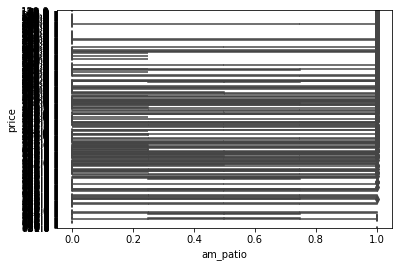

In [65]:
sns.boxplot(x='am_patio', y='price', data=listings)
plt.show()

In [51]:
listings.shape

(36559, 37)

In [52]:
for col in listings.columns: ##Eliminando las columnas que tienen un solo valor 
    if len(listings[col].unique()) == 1:
        listings.drop(col,inplace=True,axis=1)
        
print(f'Luego de remover las columnas con un valor único, permanecen {len(listings.columns)} columnas')

Luego de remover las columnas con un valor único, permanecen 34 columnas


#### 6. Reemplazando False and True por 0,1

In [53]:
listings.replace({False: 0, True: 1}, inplace=True)

#### 8. Generando dummies de variables categóricas

In [54]:
listings=pd.concat([listings, pd.get_dummies(listings['property_type'])], axis=1) 
listings=pd.concat([listings, pd.get_dummies(listings['room_type'])], axis=1) 
listings=pd.concat([listings, pd.get_dummies(listings['bathroom_type'])], axis=1) 

In [55]:
var_categorical=['property_type', 'room_type','bathroom_type' ,'bathrooms_text','amenities' ]
listings=listings.drop(var_categorical, axis=1)

In [56]:
listings.head(2)

,id,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,latitude,longitude,accommodates,bedrooms,beds,price,minimum_nights,maximum_nights,has_availability,availability_30,number_of_reviews,instant_bookable,calculated_host_listings_count,t_bathrooms,am_wifi,am_air conditioning,am_kitchen,am_parking,am_patio,am_barbecue,am_outdoor,am_games,am_soap,am_shampoo,apartment,house,other,room,entire home/apt,private room,shared room,private,shared
0,2595,0.0,6.0,1.0,1.0,40.75356,-73.98559,2,1.0,1.0,150.0,30,1125,1,30,48,0,3,1.0,1,1,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0
1,3831,0.0,1.0,1.0,1.0,40.684940000000005,-73.95765,3,1.0,1.0,76.0,1,730,1,1,396,0,1,1.0,1,1,1,1,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0


#### 9. Removiendo datos faltantes

In [57]:
listings_final=listings.dropna() 
listings.shape

(36559, 38)

In [58]:
listings_final.shape

(36559, 38)

### 3. Dataset final

In [59]:
listings_final.to_csv('Listings_clean.csv')